In [1]:
def get_images(img_file, number):
    f = open(img_file, "rb")  # Open file in binary mode
    f.read(16)  # Skip 16 bytes header
    images = []

    for i in range(number):
        image = []
        for j in range(28 * 28):
            image.append(ord(f.read(1)))
        images.append(image)
    return images


def get_labels(label_file, number):
    l = open(label_file, "rb")  # Open file in binary mode
    l.read(8)  # Skip 8 bytes header
    labels = []
    for i in range(number):
        labels.append(ord(l.read(1)))
    return labels

import numpy as np
from sklearn import svm, metrics
from mnist import MNIST
import cv2
import matplotlib.pyplot as plt

mndata = MNIST('data')
# load dataset từ thư mục data

# Train
TRAINING_SIZE = 450000
TEST_SIZE = 100000

X_train = get_images("data/emnist-byclass-train-images-idx3-ubyte", TRAINING_SIZE)
X_test = get_images("data/emnist-byclass-test-images-idx3-ubyte", TEST_SIZE)
y_train = get_labels("data/emnist-byclass-train-labels-idx1-ubyte", TRAINING_SIZE)
y_test = get_labels("data/emnist-byclass-test-labels-idx1-ubyte", TEST_SIZE)

X_train = np.array(X_train) / 255.0
X_test = np.array(X_test) / 255.0



# Test
# TEST_SIZE = 116323





print(np.ndim(X_train))


2


In [2]:
# Reshape tất cả các ảnh về dạng 28*28

X_train = X_train.reshape(X_train.shape[0], 28,28)
X_test = X_test.reshape(X_test.shape[0],28,28)

print(X_train.shape)

(450000, 28, 28)


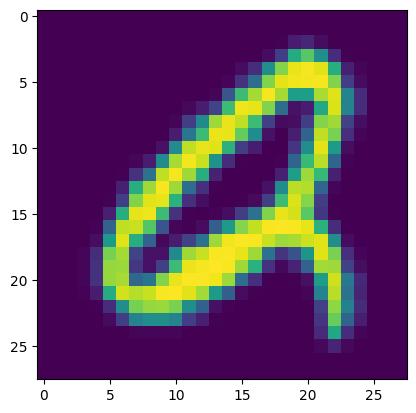

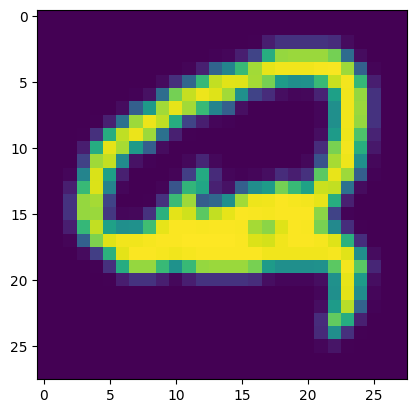

In [3]:
from matplotlib import pyplot as plt

# Hiển thị vài hình ảnh
plt.imshow(X_train[1])
plt.show()
plt.imshow(X_test[1])
plt.show()

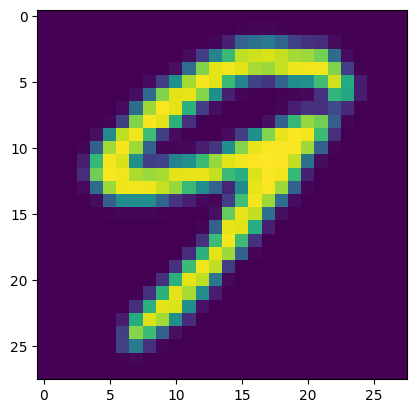

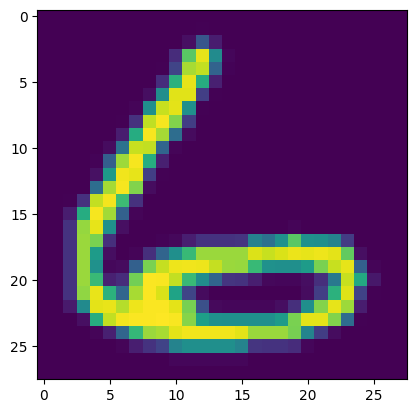

Process Complete: Rotated and reversed test and train images!


In [4]:
#xoay ảnh
#for train data
for t in range(TRAINING_SIZE):
    X_train[t]=np.transpose(X_train[t])

#for test data 
for t in range(TEST_SIZE):
    X_test[t]=np.transpose(X_test[t])

#xem ảnh đã xoay
plt.imshow(X_train[85])
plt.show()
plt.imshow(X_test[85])
plt.show()

print('Process Complete: Rotated and reversed test and train images!')

In [5]:
X_train = X_train.reshape(X_train.shape[0], 784)
X_test = X_test.reshape(X_test.shape[0],784)

print(X_train[0].shape)
print(np.ndim(X_train))

(784,)
2


In [6]:
# train data using SVM
clf = svm.SVC(kernel='rbf',C=5)

clf.fit(X_train, y_train)

SVC(C=5)

In [7]:
# điều chỉnh tham số C
# đóng khung lại do tìm được C với độ chính xác cao nhất là 5, sau đó thêm vào SVC()

# from sklearn.model_selection import GridSearchCV

# parameter_candidates = [
#   {'C': [0.001, 0.01, 0.1, 1, 5, 10, 100, 1000]},
# ]

# clf = GridSearchCV(estimator=svm.SVC(), param_grid=parameter_candidates, n_jobs=-1)
# clf.fit(train_images, train_labels)
# print('Best score:', clf.best_score_)
# print('Best C:',clf.best_estimator_.C)

In [8]:
# Predict

predict = clf.predict(X_test)


Score:  0.85579
              precision    recall  f1-score   support

           0       0.68      0.81      0.74      4967
           1       0.66      0.95      0.78      5491
           2       0.94      0.97      0.96      5043
           3       0.98      0.98      0.98      5145
           4       0.95      0.97      0.96      4894
           5       0.93      0.92      0.93      4432
           6       0.96      0.98      0.97      4901
           7       0.98      0.99      0.98      5323
           8       0.96      0.97      0.97      4865
           9       0.92      0.98      0.95      4876
          10       0.91      0.95      0.93       899
          11       0.90      0.87      0.88       561
          12       0.77      0.92      0.84      1480
          13       0.87      0.86      0.86       655
          14       0.96      0.89      0.92       732
          15       0.78      0.90      0.84      1251
          16       0.91      0.79      0.85       378
          1

In [12]:
ac_score = metrics.accuracy_score(y_test, predict)
cl_report = metrics.classification_report(y_test,predict)
f1_score = metrics.f1_score(y_test, predict, average='macro')
recall_score = metrics.recall_score(y_test, predict, average='macro')
precision_score = metrics.precision_score(y_test, predict, average='macro')
print("Score: ", ac_score)
print(cl_report)
print('precision_score=', precision_score)
print('f1_score=', f1_score)
print('recall_score=', recall_score)

Score:  0.85579
              precision    recall  f1-score   support

           0       0.68      0.81      0.74      4967
           1       0.66      0.95      0.78      5491
           2       0.94      0.97      0.96      5043
           3       0.98      0.98      0.98      5145
           4       0.95      0.97      0.96      4894
           5       0.93      0.92      0.93      4432
           6       0.96      0.98      0.97      4901
           7       0.98      0.99      0.98      5323
           8       0.96      0.97      0.97      4865
           9       0.92      0.98      0.95      4876
          10       0.91      0.95      0.93       899
          11       0.90      0.87      0.88       561
          12       0.77      0.92      0.84      1480
          13       0.87      0.86      0.86       655
          14       0.96      0.89      0.92       732
          15       0.78      0.90      0.84      1251
          16       0.91      0.79      0.85       378
          1

In [13]:
# in confusion matrix
CM = metrics.confusion_matrix(y_test, predict);

print('Confusion Matrix:\n', CM);

Confusion Matrix:
 [[4041    2    2 ...    0    0    0]
 [   0 5222    6 ...    0    0    0]
 [   2    0 4909 ...    0    0   32]
 ...
 [   0    1    3 ...  257    3    1]
 [   0    1    1 ...    1  105    0]
 [   0    0  106 ...    2    0  196]]


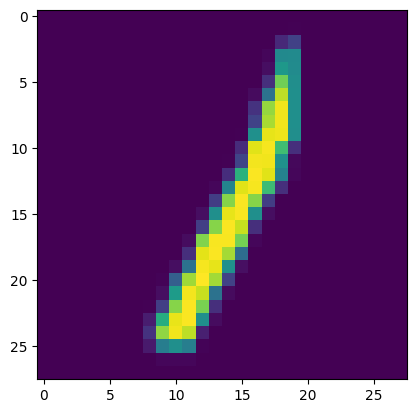

predict:  1


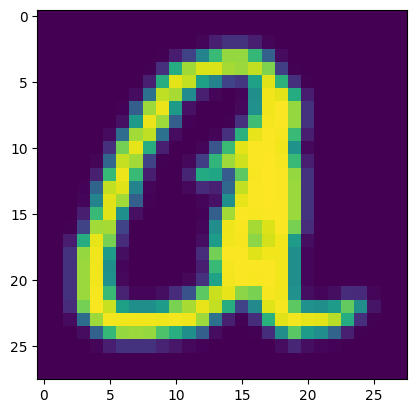

predict:  a


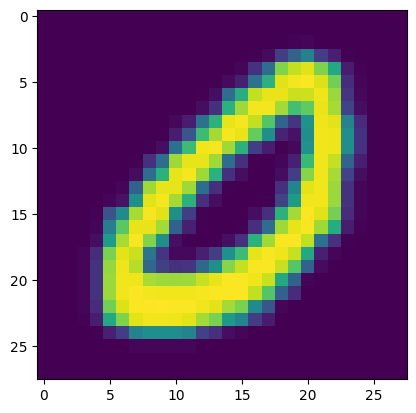

predict:  0


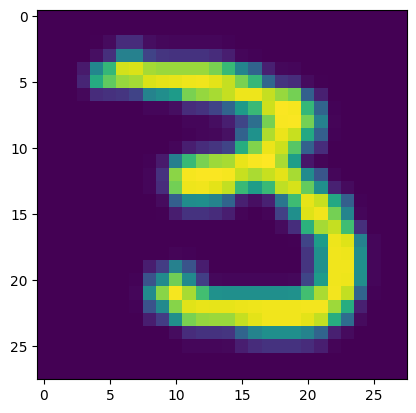

predict:  3


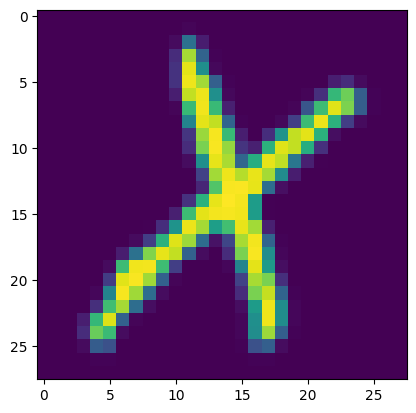

predict:  X


In [37]:
characters = ['0','1','2','3','4','5','6','7','8','9','A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z','a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']
pos = 789

for i in range(5):
    a = clf.predict(X_test[i].reshape(1,784))

    plt.imshow(X_test[i].reshape(28,28))
    plt.show()
    print("predict: ",characters[a[0]])




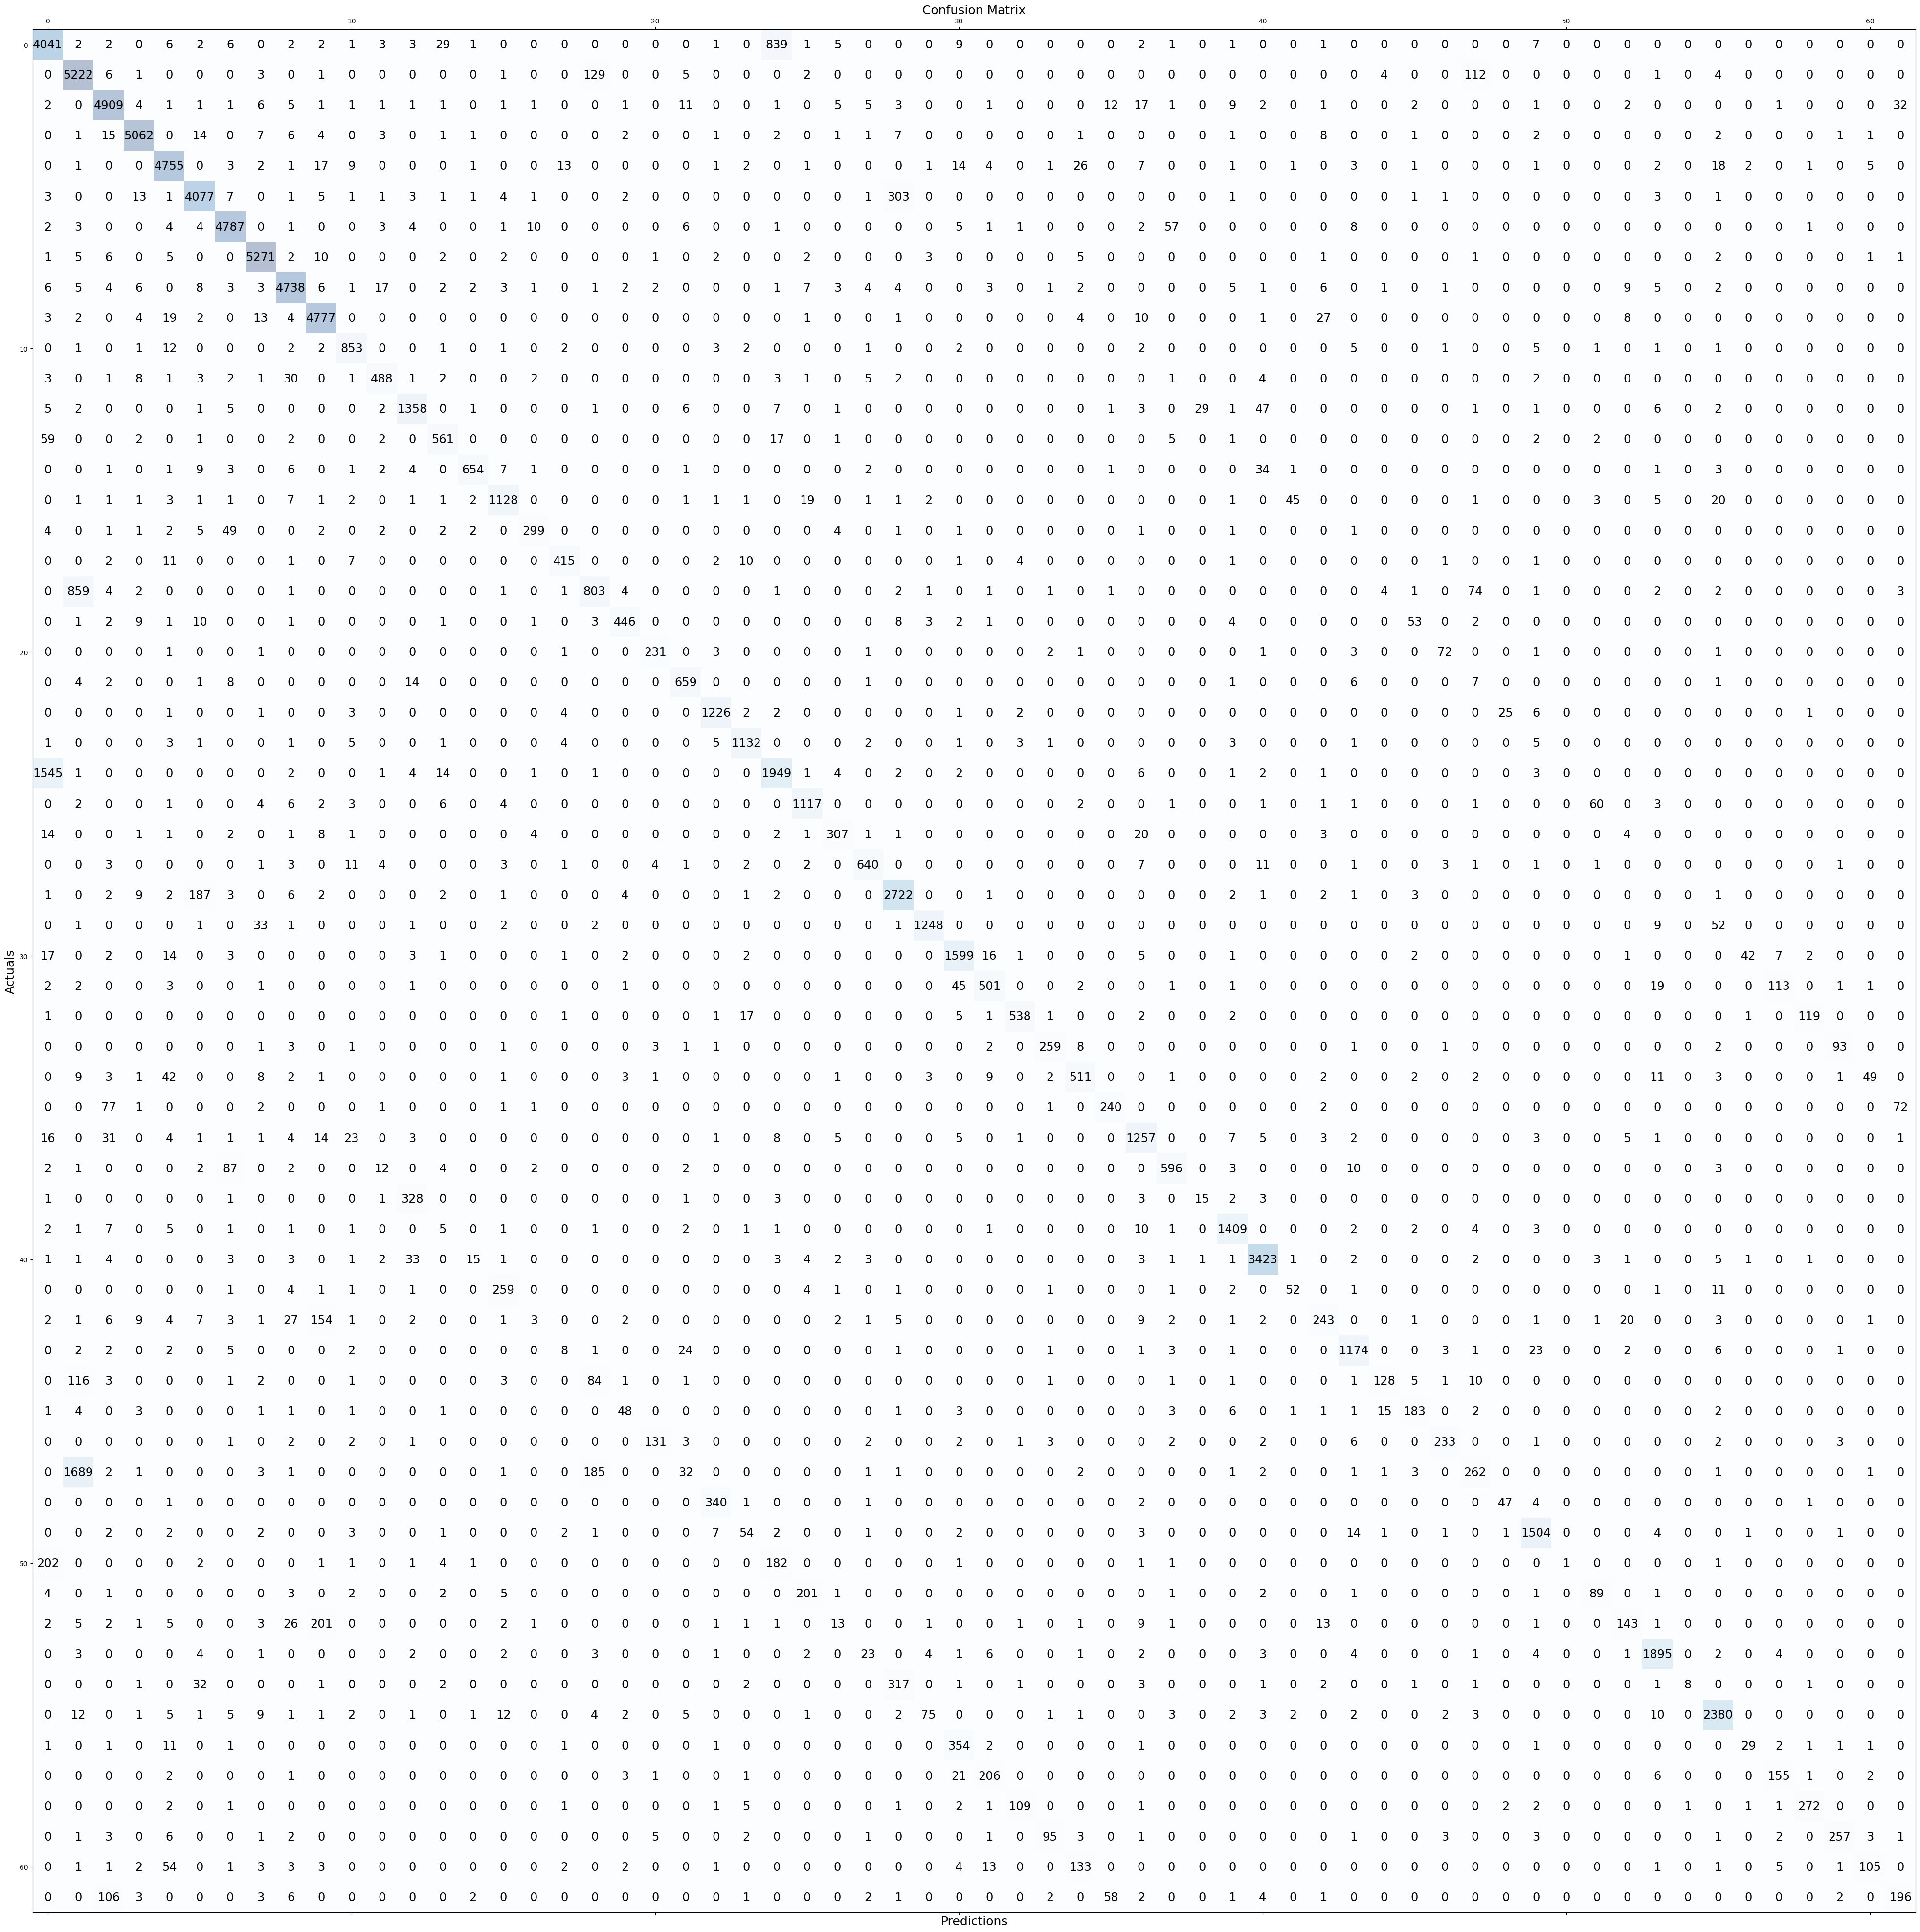

In [14]:

fig, ax = plt.subplots(figsize=(50, 50))
ax.matshow(CM, cmap=plt.cm.Blues, alpha=0.3)
for i in range(CM.shape[0]):
    for j in range(CM.shape[1]):
        ax.text(x=j, y=i,s=CM[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [16]:
# lưu model
from joblib import dump

dump(clf, 'mnist-svm6.joblib')

print('save file')

save file
